In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
import tensorflow as tf
import collections

In [2]:
#read file 
playList_df = pd.read_csv('PlayList.csv')
playList_df

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,47888,47888-13,47888-13-51,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,51,DB,DB
267001,47888,47888-13,47888-13-52,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,52,DB,DB
267002,47888,47888-13,47888-13-53,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,53,DB,DB
267003,47888,47888-13,47888-13-54,Cornerback,99,13,Outdoor,Synthetic,33,Sunny and cold,Pass,54,DB,DB


In [3]:
print('Number of players: {}'.format(playList_df.PlayerKey.nunique()))
print('Number of plays: {}'.format(playList_df.PlayKey.nunique()))
print('Number of games: {}'.format(playList_df.GameID.nunique()))

Number of players: 250
Number of plays: 267005
Number of games: 5712


In [4]:
playList_df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'RosterPosition', 'PlayerDay',
       'PlayerGame', 'StadiumType', 'FieldType', 'Temperature', 'Weather',
       'PlayType', 'PlayerGamePlay', 'Position', 'PositionGroup'],
      dtype='object')

In [5]:
playList_df.describe()

,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,267005.000000,267005.000000,267005.000000,267005.000000,267005.000000
mean,41515.381465,210.451351,13.799131,-35.029535,29.058647
std,4125.858924,183.643654,8.342894,304.583110,19.626551
min,26624.000000,-62.000000,1.000000,-999.000000,1.000000
25%,39653.000000,43.000000,7.000000,44.000000,13.000000
50%,42432.000000,102.000000,13.000000,61.000000,26.000000
75%,44480.000000,400.000000,20.000000,72.000000,43.000000
max,47888.000000,480.000000,32.000000,97.000000,102.000000


In [6]:
playList_df.describe(include = 'object')

,GameID,PlayKey,RosterPosition,StadiumType,FieldType,Weather,PlayType,Position,PositionGroup
count,267005,267005,267005,250095,267005,248314,266638,267005,267005
unique,5712,267005,10,29,2,63,11,23,10
top,41113-13,26624-1-1,Linebacker,Outdoor,Natural,Cloudy,Pass,WR,DB
freq,102,1,50129,145032,156902,60705,138079,43457,68295


In [8]:
def derive_missing_values_ratio(original_df, categorical=False):
    if not categorical: 
        df = original_df.describe()
    else:
        df = original_df.describe(include = 'object')
    missing_row = {}
    cardinality_row = {}
    median_row = {}
    for column in df.columns:
        miss_per = round(((original_df[column].isna().sum() / original_df.shape[0]) * 100), 1)
        missing_row[column] = str(miss_per) + '%' 
        if not categorical:
            cardinality_row[column] = original_df[column].nunique()
            median_row[column] = original_df[column].median()
            
    if not categorical:
        df.loc["median"] = median_row
        df.loc["cardinality"] = cardinality_row    
    df.loc["missing"] = missing_row
    return df

In [9]:
derive_missing_values_ratio(playList_df)

,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,267005.0,267005.0,267005.0,267005.0,267005.0
mean,41515.381465,210.451351,13.799131,-35.029535,29.058647
std,4125.858924,183.643654,8.342894,304.58311,19.626551
min,26624.0,-62.0,1.0,-999.0,1.0
25%,39653.0,43.0,7.0,44.0,13.0
50%,42432.0,102.0,13.0,61.0,26.0
75%,44480.0,400.0,20.0,72.0,43.0
max,47888.0,480.0,32.0,97.0,102.0
median,42432.0,102.0,13.0,61.0,26.0
cardinality,250.0,215.0,32.0,79.0,102.0


In [10]:
derive_missing_values_ratio(playList_df, True)

,GameID,PlayKey,RosterPosition,StadiumType,FieldType,Weather,PlayType,Position,PositionGroup
count,267005,267005,267005,250095,267005,248314,266638,267005,267005
unique,5712,267005,10,29,2,63,11,23,10
top,41113-13,26624-1-1,Linebacker,Outdoor,Natural,Cloudy,Pass,WR,DB
freq,102,1,50129,145032,156902,60705,138079,43457,68295
missing,0.0%,0.0%,0.0%,6.3%,0.0%,7.0%,0.1%,0.0%,0.0%


In [11]:
print('Number of duplicated rows in Player List dataset is {}.'.format(playList_df.duplicated().sum()))

Number of duplicated rows in Player List dataset is 0.


In [12]:
playList_df.loc[(playList_df['Temperature'] < 0),'Temperature'].count()

24170

In [13]:
TEMP_MEDIAN =playList_df['Temperature'].median()
TEMP_MEDIAN

61.0

In [14]:
# replace negative temperature values with median
playList_df.loc[(playList_df['Temperature'] < 0),'Temperature'] = TEMP_MEDIAN
playList_df.loc[(playList_df['Temperature'] < 0),'Temperature'].count()

0

In [15]:
playList_df.loc[(playList_df['PlayerDay'] < 0),'Temperature'].count()

6336

In [16]:
#values in the game play are negative we need the absolute values
playList_df["PlayerDay"] = playList_df["PlayerDay"].abs()

In [17]:
MODE_WEATHER = playList_df['Weather'].mode()[0]
MODE_WEATHER

'Cloudy'

In [18]:
MODE_STADIUM = playList_df['StadiumType'].mode()[0]
MODE_STADIUM

'Outdoor'

In [19]:
MODE_PLAYTYPE = playList_df['PlayType'].mode()[0]
MODE_PLAYTYPE

'Pass'

In [20]:
#imputation for weather with mode
playList_df.loc[(playList_df['Weather'].isna()),'Weather']= MODE_WEATHER
playList_df.loc[(playList_df['Weather'].isna()),'Weather'].count()

0

In [21]:
#imputation for stadium type with mode
playList_df.loc[(playList_df['StadiumType'].isna()),'StadiumType']= MODE_STADIUM
playList_df.loc[(playList_df['StadiumType'].isna()),'StadiumType'].count()

0

In [22]:
#imputation for play type with mode
playList_df.loc[(playList_df['PlayType'].isna()),'PlayType']= MODE_PLAYTYPE
playList_df.loc[(playList_df['PlayType'].isna()),'PlayType'].count()

0

In [23]:
derive_missing_values_ratio(playList_df)

,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,267005.0,267005.0,267005.0,267005.0,267005.0
mean,41515.381465,212.089725,13.799131,60.924473,29.058647
std,4125.858924,181.749027,8.342894,16.761303,19.626551
min,26624.0,1.0,1.0,9.0,1.0
25%,39653.0,43.0,7.0,49.0,13.0
50%,42432.0,102.0,13.0,61.0,26.0
75%,44480.0,400.0,20.0,72.0,43.0
max,47888.0,480.0,32.0,97.0,102.0
median,42432.0,102.0,13.0,61.0,26.0
cardinality,250.0,212.0,32.0,78.0,102.0


In [24]:
derive_missing_values_ratio(playList_df, True)

,GameID,PlayKey,RosterPosition,StadiumType,FieldType,Weather,PlayType,Position,PositionGroup
count,267005,267005,267005,267005,267005,267005,267005,267005,267005
unique,5712,267005,10,29,2,63,11,23,10
top,41113-13,26624-1-1,Linebacker,Outdoor,Natural,Cloudy,Pass,WR,DB
freq,102,1,50129,161942,156902,79396,138446,43457,68295
missing,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [25]:
games_df = playList_df[['GameID', 'StadiumType', 'FieldType', 'Weather','Temperature']].drop_duplicates().reset_index().drop(columns=['index'])
games_df.head()

,GameID,StadiumType,FieldType,Weather,Temperature
0,26624-1,Outdoor,Synthetic,Clear and warm,63
1,26624-2,Indoors,Synthetic,Mostly Cloudy,85
2,26624-3,Outdoor,Synthetic,Sunny,84
3,26624-4,Outdoor,Synthetic,Sunny,61
4,26624-5,Outdoor,Natural,Clear,76


In [26]:
games_df.describe()

,Temperature
count,5712.000000
mean,60.883754
std,16.648544
min,9.000000
25%,49.000000
50%,61.000000
75%,72.000000
max,97.000000


In [27]:
games_df.describe(include = 'object')

,GameID,StadiumType,FieldType,Weather
count,5712,5712,5712,5712
unique,5712,29,2,63
top,26624-1,Outdoor,Natural,Cloudy
freq,1,3392,3311,1704


In [28]:
games_df.StadiumType.unique() 

array(['Outdoor', 'Indoors', 'Oudoor', 'Outdoors', 'Open', 'Closed Dome',
       'Domed, closed', 'Dome', 'Indoor', 'Domed', 'Retr. Roof-Closed',
       'Outdoor Retr Roof-Open', 'Retractable Roof', 'Ourdoor',
       'Indoor, Roof Closed', 'Retr. Roof - Closed', 'Bowl', 'Outddors',
       'Retr. Roof-Open', 'Dome, closed', 'Indoor, Open Roof',
       'Domed, Open', 'Domed, open', 'Heinz Field', 'Cloudy',
       'Retr. Roof - Open', 'Retr. Roof Closed', 'Outdor', 'Outside'],
      dtype=object)

In [29]:
games_df.Weather.unique() 

array(['Clear and warm', 'Mostly Cloudy', 'Sunny', 'Clear', 'Cloudy',
       'Cloudy, fog started developing in 2nd quarter', 'Rain',
       'Partly Cloudy', 'Mostly cloudy', 'Cloudy and cold',
       'Cloudy and Cool', 'Rain Chance 40%', 'Controlled Climate',
       'Sunny and warm', 'Partly cloudy', 'Clear and Cool',
       'Clear and cold', 'Sunny and cold', 'Indoor', 'Partly Sunny',
       'N/A (Indoors)', 'Mostly Sunny', 'Indoors', 'Clear Skies',
       'Partly sunny', 'Showers', 'N/A Indoor', 'Sunny and clear', 'Snow',
       'Scattered Showers', 'Party Cloudy', 'Clear skies',
       'Rain likely, temps in low 40s.', 'Hazy', 'Partly Clouidy',
       'Sunny Skies', 'Overcast', 'Cloudy, 50% change of rain', 'Fair',
       'Light Rain', 'Partly clear', 'Mostly Coudy', '10% Chance of Rain',
       'Cloudy, chance of rain', 'Heat Index 95',
       'Sunny, highs to upper 80s', 'Sun & clouds',
       'Heavy lake effect snow', 'Mostly sunny', 'Cloudy, Rain',
       'Sunny, Windy', 'Mostl

In [30]:
#categorize weather since there is high cardinality for this categorical feature
#create some constants
#weather categories
CLOUDY_WEATHER = ['Cloudy 50% change of rain', 'Hazy', 'Cloudy.', 'Overcast', 'Mostly Cloudy',
                  'Cloudy, fog started developing in 2nd quarter', 'Partly Cloudy',
                  'Mostly cloudy', 'Rain Chance 40%', ' Partly cloudy', 'Party Cloudy',
                  'Rain likely, temps in low 40s', 'Partly Clouidy', 'Cloudy, 50% change of rain', 
                  'Mostly Coudy', '10% Chance of Rain',
                  'Cloudy, chance of rain', '30% Chance of Rain', 'Cloudy, light snow accumulating 1-3"',
                  'cloudy', 'Coudy', 
                  'Cloudy with periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
                  'Cloudy fog started developing in 2nd quarter', 'Cloudy light snow accumulating 1-3"',
                  'Cloudywith periods of rain, thunder possible. Winds shifting to WNW, 10-20 mph.',
                  'Cloudy 50% change of rain', 'Cloudy and cold',
                  'Cloudy and Cool', 'Partly cloudy']

CLEAR_WEATHER = ['Clear, Windy', ' Clear to Cloudy', 'Clear, highs to upper 80s',
                 'Clear and clear', 'Partly sunny',
                 'Clear, Windy', 'Clear skies', 'Sunny', 'Partly Sunny', 'Mostly Sunny', 'Clear Skies',
                 'Sunny Skies', 'Partly clear', 'Fair', 'Sunny, highs to upper 80s', 'Sun & clouds', 
                 'Mostly sunny', 'Sunny, Windy',
                 'Mostly Sunny Skies', 'Clear and Sunny', 'Clear and sunny', 'Clear to Partly Cloudy',
                 'Clear Skies',
                 'Clear and cold', 'Clear and warm', 'Clear and Cool', 'Sunny and cold', 
                 'Sunny and warm', 'Sunny and clear']

RAINY_WEATHER = ['Rainy', 'Rain', 'Scattered Showers', 'Showers', 'Cloudy Rain', 'Light Rain',
                 'Rain shower', 'Rain likely, temps in low 40s.', 'Cloudy, Rain']

SNOWY_WEATHER = ['Heavy lake effect snow', 'Snow']

INDOORS = ['Controlled Climate', 'Indoors', 'N/A Indoor', 'N/A (Indoors)']

REST = ['Heat Index 95', 'Cold']

#Stadium categories
OUTDOOR_REGEX = r'Oudoor|Outdoors|Ourdoor|Outddors|Outdor|Outside|Open'
INDOOR_REGEX = r'Indoors|Indoor, Roof Closed|Indoor, Open Roof'
DOME_REGEX = r'Closed Dome|Domed, closed|Domed, Open|Domed, open|Dome, closed|Domed'
RETRACTABLE_REGEX = r'Retr. Roof-Closed|Outdoor Retr Roof-Open|Retr. Roof - Closed|Retr. Roof-Open|Retr. Roof - Open|Retr. Roof Closed'
INVALID = ['Bowl', 'Heinz Field', 'Cloudy']

REPLACEMENTS =  {'Indoor': INDOOR_REGEX, 
                 'Dome': DOME_REGEX,
                 'Retractable Roof': RETRACTABLE_REGEX,
                 'Outdoor': OUTDOOR_REGEX}

In [31]:
def plot_labels(ax, space=5, decs=0):
    """Method that adds labels to the end of each bar"""
    for rectangle in ax.patches:
        y_v = rectangle.get_height()
        x_v = rectangle.get_x() + rectangle.get_width() / 2
        vert_align = 'bottom'
        if y_v < 0:
            space *= -1
            vert_align = 'top'

        lbl = ("{:." + str(decs) + "f}").format(y_v)
        ax.annotate(lbl, (x_v, y_v), xytext=(0, space), textcoords="offset points", ha='center', va=vert_align)    

In [32]:
def plot_game_features(df, rotation=0, add_labels=True, figsize=(14, 16)):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(4, 3, hspace=0.2, wspace=0.2)
    stadium = fig.add_subplot(grid[0, :2])
    fieldtype = fig.add_subplot(grid[0, 2])
    weather = fig.add_subplot(grid[1, 0:])
    temperature = fig.add_subplot(grid[2, 0:])

    stadium.bar(df.StadiumType.value_counts().keys(),
                   df.StadiumType.value_counts().values, color='#6495ED')
    stadium.set_title('StadiumType')
    stadium.set_xticklabels(
        df.StadiumType.value_counts().keys(), rotation=rotation)

    if add_labels:
        plot_labels(stadium, space=5)

    fieldtype.bar(df.FieldType.value_counts().keys(), df.FieldType.value_counts().values, color=['#6495ED', '#FF7D40'])
    fieldtype.set_title('FieldType')
    fieldtype.set_xticklabels(
        df.FieldType.value_counts().keys(), rotation=0)

    if add_labels:
        plot_labels(fieldtype, space=5)

    weather.bar(df.Weather.value_counts().keys(), df.Weather.value_counts().values, color='#6495ED')
    weather.set_title('Weather')
    weather.set_xticklabels(
        df.Weather.value_counts().keys(), rotation=rotation)

    if add_labels:
        plot_labels(weather, space=5)

    temperature.hist(df.Temperature.astype(
        int).values, bins=30, range=(0, 90), color = "#CD1076", lw=0)
    temperature.set_xlim(0, 110)
    temperature.set_xticks(range(0, 110, 10))
    temperature.set_xticklabels(range(0, 110, 10))
    temperature.set_title('Temperature')

    plt.suptitle('Games Dataset Exploration', fontsize=16)
    plt.show()

In [33]:
def categorize_weather(row):
    if row.Weather in CLOUDY_WEATHER:
        return 'Cloudy'  
    if row.Weather in CLEAR_WEATHER:
        return 'Clear'
    if row.Weather in RAINY_WEATHER:
        return 'Rainy'
    if row.Weather in INDOORS:
        return 'Indoor'
    if row.Weather in SNOWY_WEATHER:
        return 'Snowy'
    if row.Weather in REST:
        return np.nan
    return row.Weather

In [34]:
def replace_variable_values(df, field):
    
    def clean_variable(row):
        if row[field] in INVALID:
            return np.nan
        else:
            return row[field]
    
    replaced_df = df.copy()
    for key, value in REPLACEMENTS.items():
        replaced_df[field] = replaced_df[field].str.replace(value, key)
         
    replaced_df[field] = replaced_df.apply(
        lambda row: clean_variable(row), axis=1)

    return replaced_df

C:\Users\koutoua\AppData\Local\Temp\ipykernel_34308\2163648409.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  replaced_df[field] = replaced_df[field].str.replace(value, key)
C:\Users\koutoua\AppData\Local\Temp\ipykernel_34308\1233269878.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  stadium.set_xticklabels(
C:\Users\koutoua\AppData\Local\Temp\ipykernel_34308\1233269878.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  fieldtype.set_xticklabels(
C:\Users\koutoua\AppData\Local\Temp\ipykernel_34308\1233269878.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  weather.set_xticklabels(


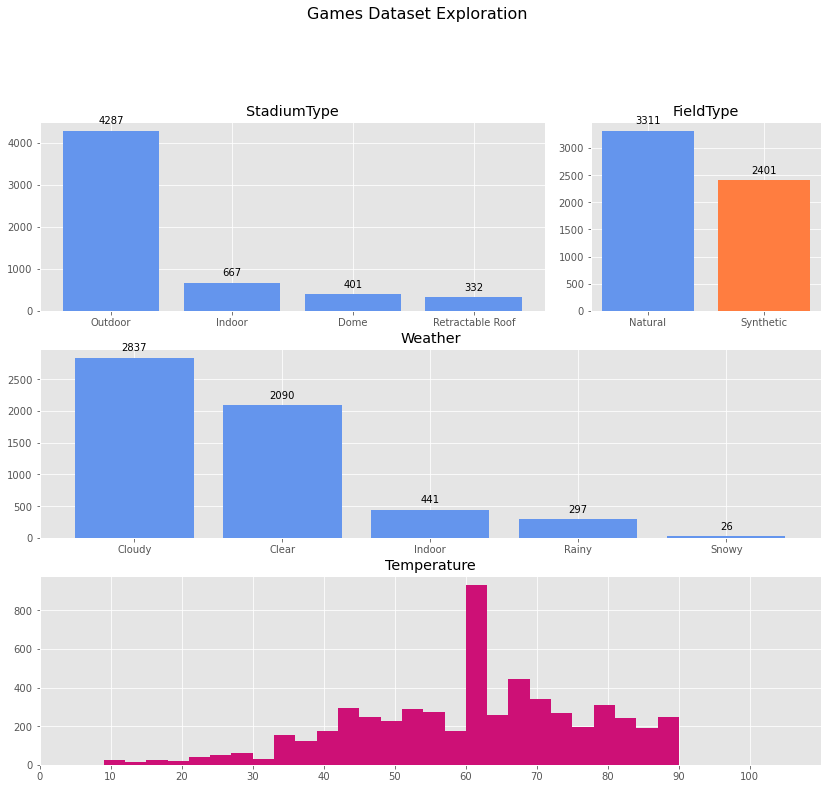

In [35]:
#replace stadium type values
playList_clean = replace_variable_values(playList_df, 'StadiumType')
#categorize weather values
playList_clean['Weather'] = playList_clean.apply(lambda row: categorize_weather(row), axis=1)
#drop duplicates
games_clean = playList_clean[['GameID', 'StadiumType', 'FieldType', 'Weather', 'Temperature']].drop_duplicates().reset_index().drop(columns=['index'])
#visualize
plot_game_features(games_clean)

In [36]:
players_info = playList_clean[['PlayerKey', 'RosterPosition', 'PlayerGamePlay', 'Position', 'PositionGroup']]
players_info 

,PlayerKey,RosterPosition,PlayerGamePlay,Position,PositionGroup
0,26624,Quarterback,1,QB,QB
1,26624,Quarterback,2,QB,QB
2,26624,Quarterback,3,QB,QB
3,26624,Quarterback,4,QB,QB
4,26624,Quarterback,5,QB,QB
...,...,...,...,...,...
267000,47888,Cornerback,51,DB,DB
267001,47888,Cornerback,52,DB,DB
267002,47888,Cornerback,53,DB,DB
267003,47888,Cornerback,54,DB,DB


In [37]:
def plot_players_data(df, figsize=(22, 20), add_labels=True):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=figsize)
    grid = plt.GridSpec(3, 4, hspace=0.2, wspace=0.2)
    plays = fig.add_subplot(grid[0, 0:2])
    max_rolling_plays = fig.add_subplot(grid[1, 0:2])
    rosterposition = fig.add_subplot(grid[0, 2:])
    positiongroup = fig.add_subplot(grid[1, 2:])
    position = fig.add_subplot(grid[2, 0:])

    plays.hist(df.groupby(by=['PlayerKey']).count()[
                  'RosterPosition'].values, color='#CD1076', bins=50)
    plays.set_title('Number of Plays')

    max_rolling_plays.hist(df.groupby(
        by=['PlayerKey']).PlayerGamePlay.max().values, bins=30, color='#CD1076')
    max_rolling_plays.set_title(
        'Maximum number of Rolling Plays')

    rosterposition.bar(df.RosterPosition.value_counts().keys().values, 
                       df.RosterPosition.value_counts().values, color='#6495ED')
    
    rosterposition.set_xticklabels(df.RosterPosition.value_counts().keys().values, rotation=20)
    rosterposition.set_title('Roster Position')
    if add_labels:
        plot_labels(rosterposition, space=5)

    position.bar(df.Position.value_counts().keys().values,
                    df.Position.value_counts().values, color='#6495ED')
    position.set_title('Position')
    if add_labels:
        plot_labels(position, space=5)

    positiongroup.bar(df.PositionGroup.value_counts().keys().values,
                      df.PositionGroup.value_counts().values, color='#6495ED')
    positiongroup.set_title('Position Group')
    if add_labels:
        plot_labels(positiongroup, space=5)

    plt.suptitle('Player Dataset Exploration', fontsize=16)
    plt.show()

C:\Users\koutoua\AppData\Local\Temp\ipykernel_34308\3455370230.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  rosterposition.set_xticklabels(df.RosterPosition.value_counts().keys().values, rotation=20)


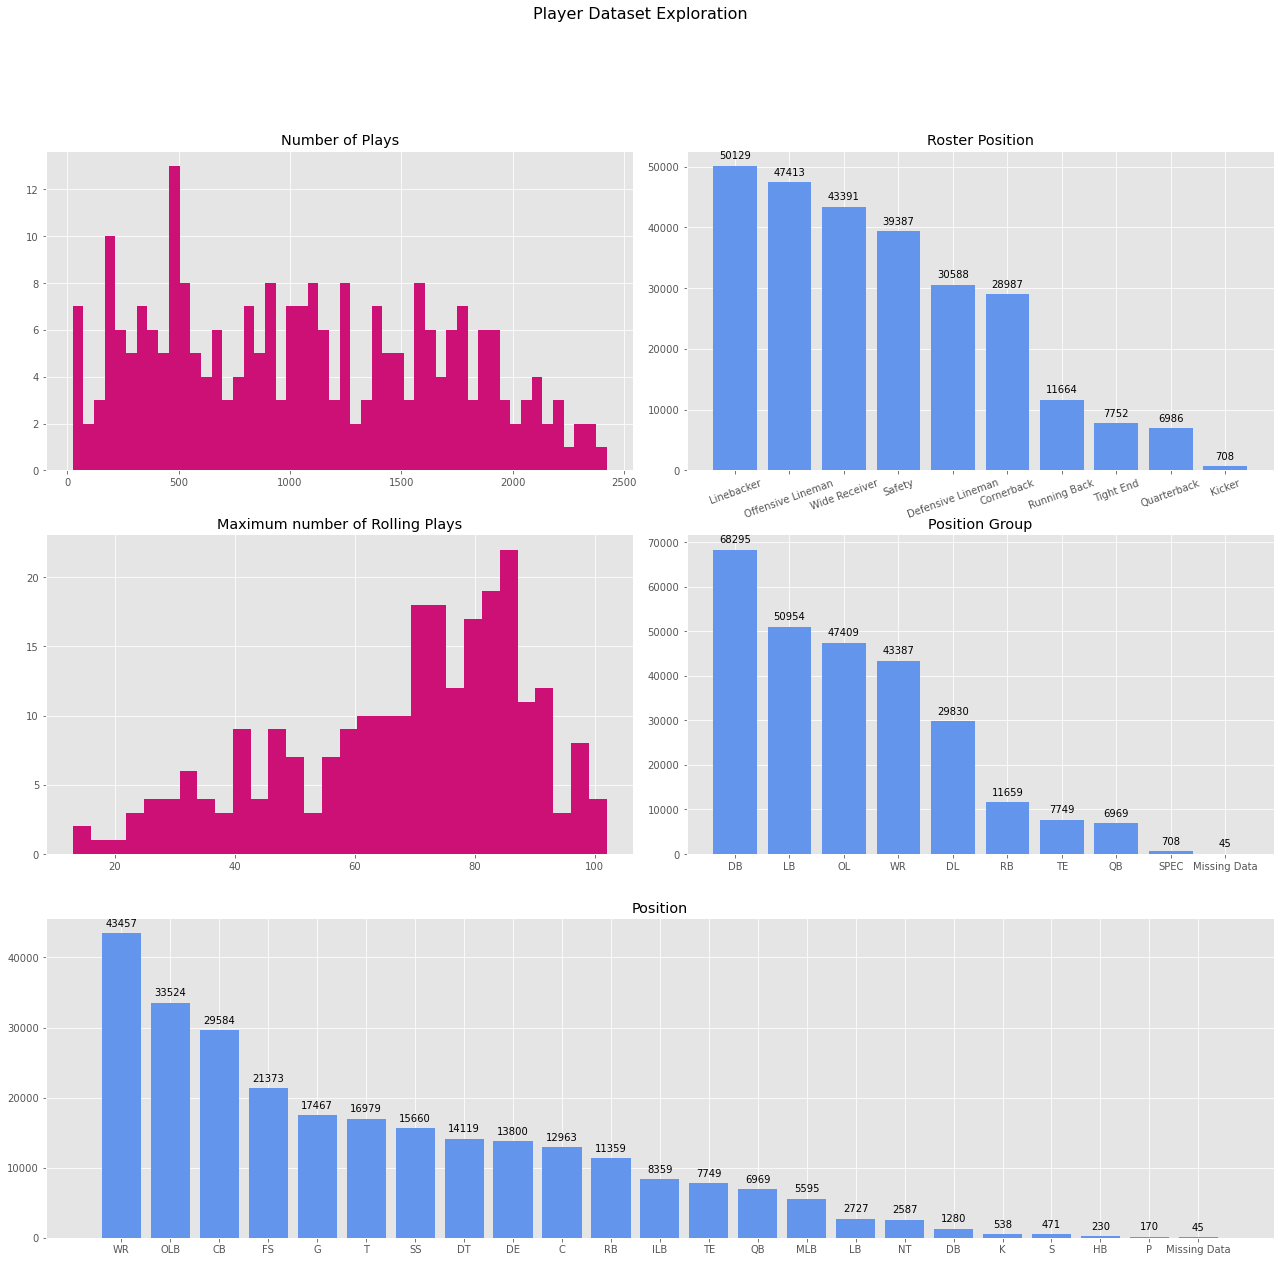

In [38]:
plot_players_data(players_info)

In [39]:
def plot_play(df, size=16, rot=20, fig_size=(16, 6)):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    plt.bar(df.PlayType.value_counts().keys().values,
            df.PlayType.value_counts().values, color='#6495ED')
    plt.xticks(range(len(df.PlayType.value_counts().keys().values)),
               df.PlayType.value_counts().keys().values, rotation=rot)
    plot_labels(ax, space=5)
    plt.title('PlayType Exploration', fontsize=size)
    plt.show()

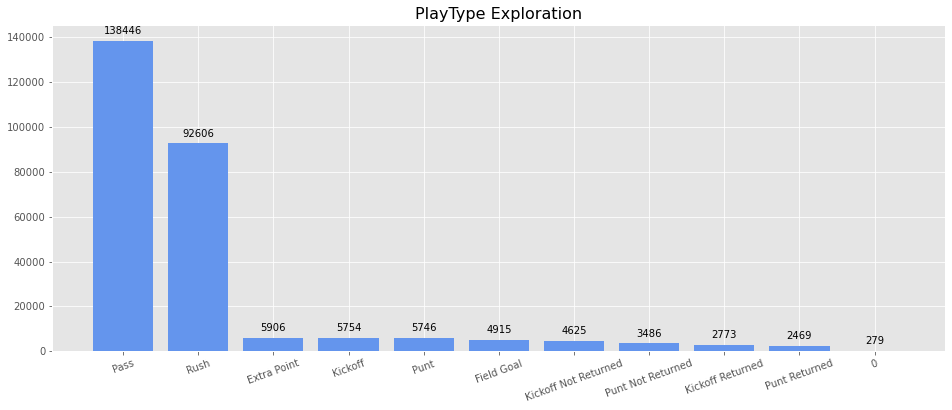

In [40]:
plot_play(playList_clean)

In [41]:
playList_clean

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,5,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267000,47888,47888-13,47888-13-51,Cornerback,99,13,Outdoor,Synthetic,33,Clear,Pass,51,DB,DB
267001,47888,47888-13,47888-13-52,Cornerback,99,13,Outdoor,Synthetic,33,Clear,Pass,52,DB,DB
267002,47888,47888-13,47888-13-53,Cornerback,99,13,Outdoor,Synthetic,33,Clear,Pass,53,DB,DB
267003,47888,47888-13,47888-13-54,Cornerback,99,13,Outdoor,Synthetic,33,Clear,Pass,54,DB,DB


In [42]:
playList_no_dups =  playList_clean.drop_duplicates('GameID')
playList_no_dups

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear,Pass,1,QB,QB
81,26624,26624-2,26624-2-1,Quarterback,11,2,Indoor,Synthetic,85,Cloudy,Pass,1,QB,QB
157,26624,26624-3,26624-3-1,Quarterback,18,3,Outdoor,Synthetic,84,Clear,Rush,1,QB,QB
221,26624,26624-4,26624-4-1,Quarterback,25,4,Outdoor,Synthetic,61,Clear,Pass,1,QB,QB
291,26624,26624-5,26624-5-1,Quarterback,29,5,Outdoor,Natural,76,Clear,Pass,1,QB,QB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266741,47888,47888-9,47888-9-1,Cornerback,71,9,Outdoor,Synthetic,53,Cloudy,Pass,1,DB,DB
266795,47888,47888-10,47888-10-1,Cornerback,78,10,Outdoor,Natural,82,Cloudy,Rush,1,DB,DB
266833,47888,47888-11,47888-11-1,Cornerback,85,11,Outdoor,Natural,42,Cloudy,Pass,1,DB,DB
266889,47888,47888-12,47888-12-1,Cornerback,92,12,Outdoor,Synthetic,40,Clear,Rush,1,DB,DB


In [43]:
derive_missing_values_ratio(playList_no_dups)

,PlayerKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay
count,5712.0,5712.0,5712.0,5712.0,5712.0
mean,41763.409839,209.81145,13.433999,60.883754,1.002801
std,4111.641011,182.424478,8.336693,16.648544,0.154291
min,26624.0,1.0,1.0,9.0,1.0
25%,39656.0,43.0,6.0,49.0,1.0
50%,42549.0,99.0,13.0,61.0,1.0
75%,44546.0,400.0,20.0,72.0,1.0
max,47888.0,480.0,32.0,97.0,11.0
median,42549.0,99.0,13.0,61.0,1.0
cardinality,250.0,212.0,32.0,78.0,3.0


In [44]:
derive_missing_values_ratio(playList_df, True)

,GameID,PlayKey,RosterPosition,StadiumType,FieldType,Weather,PlayType,Position,PositionGroup
count,267005,267005,267005,267005,267005,267005,267005,267005,267005
unique,5712,267005,10,29,2,63,11,23,10
top,41113-13,26624-1-1,Linebacker,Outdoor,Natural,Cloudy,Pass,WR,DB
freq,102,1,50129,161942,156902,79396,138446,43457,68295
missing,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [56]:
playList_no_dups.to_pickle("PlayList_No_Dups.plk")

In [46]:
injury_rec_df = pd.read_csv('InjuryRecord.csv')
injury_rec_df.columns

Index(['PlayerKey', 'GameID', 'PlayKey', 'BodyPart', 'Surface', 'DM_M1',
       'DM_M7', 'DM_M28', 'DM_M42'],
      dtype='object')

In [47]:
injury_rec_df.describe()

,PlayerKey,DM_M1,DM_M7,DM_M28,DM_M42
count,105.000000,105.0,105.000000,105.000000,105.000000
mean,42283.609524,1.0,0.723810,0.352381,0.276190
std,4163.510366,0.0,0.449257,0.480003,0.449257
min,31070.000000,1.0,0.000000,0.000000,0.000000
25%,39656.000000,1.0,0.000000,0.000000,0.000000
50%,43518.000000,1.0,1.000000,0.000000,0.000000
75%,45966.000000,1.0,1.000000,1.000000,1.000000
max,47813.000000,1.0,1.000000,1.000000,1.000000


In [48]:
injury_rec_df.describe(include='object')

,GameID,PlayKey,BodyPart,Surface
count,105,77,105,105
unique,104,76,5,2
top,47307-10,47307-10-18,Knee,Synthetic
freq,2,2,48,57


In [49]:
derive_missing_values_ratio(injury_rec_df)

,PlayerKey,DM_M1,DM_M7,DM_M28,DM_M42
count,105.0,105.0,105.0,105.0,105.0
mean,42283.609524,1.0,0.72381,0.352381,0.27619
std,4163.510366,0.0,0.449257,0.480003,0.449257
min,31070.0,1.0,0.0,0.0,0.0
25%,39656.0,1.0,0.0,0.0,0.0
50%,43518.0,1.0,1.0,0.0,0.0
75%,45966.0,1.0,1.0,1.0,1.0
max,47813.0,1.0,1.0,1.0,1.0
median,43518.0,1.0,1.0,0.0,0.0
cardinality,100.0,1.0,2.0,2.0,2.0


In [50]:
derive_missing_values_ratio(injury_rec_df, True)

,GameID,PlayKey,BodyPart,Surface
count,105,77,105,105
unique,104,76,5,2
top,47307-10,47307-10-18,Knee,Synthetic
freq,2,2,48,57
missing,0.0%,26.7%,0.0%,0.0%


In [51]:
print('Number of duplicated rows in Injury dataset is {}.'.format(injury_rec_df.duplicated().sum()))

Number of duplicated rows in Injury dataset is 0.


In [52]:
#example to see that some duplicated field make sense since refering to the same game id same player but 
#two different body parts were injured. We need this for predicting later the body parts likely to be injured.
injury_rec_df.loc[injury_rec_df['GameID'] == '47307-10']

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
86,47307,47307-10,47307-10-18,Knee,Synthetic,1,1,0,0
87,47307,47307-10,47307-10-18,Ankle,Synthetic,1,1,0,0


In [58]:
#have this info in the playlist dataset
injury_rec_df =injury_rec_df.drop(['Surface'], axis=1)

In [59]:
injury_rec_df.to_pickle("Injury.plk")